# 6. NumPy & Pandas

In the sixth section we present two powerful libraries for
efficient scientific computing: __NumPy__ and __Pandas__. 
Note that we won't be able to illustrated the full potential 
of each library but rather present a selection of useful tools. 
For more details you might want to check out the
[NumPy User Guide](https://docs.scipy.org/doc/numpy/user/index.html) 
or the [Pandas Tutorial Guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

In addition, we have a look on how one can use __seaborn__ to create
plots when working with Pandas. For more details on seaborn you might
want to visit the [seaborn Tutorial Overview](https://seaborn.pydata.org/tutorial.html).

In this part we revisit some of the previous concepts
and learn

* about array manipulation with NumPy,
* how to work with Pandas DataFrames and
* how to plot in these frameworks.

Keywords: ```np.array```, ```shape```, ```astype```, ```np.matmul```,
```np.multiply```, ```np.mean```, ```np.arange```, ```np.reshape```, 
```np.append```, ```np.random```, ```np.newaxis```, ```np.savetxt```, 
```np.loadtxt```, ```np.where```, ```np.delete```, ```np.unique```, ```pd.DataFrame```, ```value_counts```, ```head```, ```pd.groupby```, ```pd.describe```, ```pd.read_csv```, ```pd.to_csv```, 
```seaborn```, ```sns.countplot```, ```sns.boxplot```, ```sns.violinplot```, 
```sns.jointplot```, ```*.feather```

***
## NumPy

NumPy adds a lot of efficient ways to work with large list and 
matrices, which are also referred to as __arrays__, and a large number 
of high-level mathematical functions. In most cases, it is much 
__more efficient__ to work with NumPy objects instead of the built-in 
objects we encountered so far. So if you have large arrays you are
working with, performing calculations with NumPy is usally a 
good choice to do fast computation.

As before, we need to import the NumPy library first. The common
abbrevation is ```np```.

In [1]:
import numpy as np

### Initialising NumPy arrays

Let us compare the "old" list type with NumPy arrays!

In [2]:
old_list = [1,2,3,4]
np_list = np.array( old_list )

print(old_list, "vs", np_list)

[1, 2, 3, 4] vs [1 2 3 4]


In [3]:
old_matrix = [[1,2,3],[4,5,6]]
np_matrix = np.array(old_matrix)

print(old_matrix, "\nvs\n", np_matrix)

[[1, 2, 3], [4, 5, 6]] 
vs
 [[1 2 3]
 [4 5 6]]


In [4]:
print(type(old_matrix))
print(type(np_matrix))

<class 'list'>
<class 'numpy.ndarray'>


In [5]:
len(np_matrix)

2

In [6]:
np_matrix.shape

(2, 3)

In [7]:
np_matrix.ndim

2

#### Note
that the output of ```shape``` can be interpeted as the 
__number of rows and columns__ in the matrix, while ```dim```
specifies the number of __dimensions__, i.e. _there is one row
and one column dimension_.

In [8]:
test_array = np.arange(2,10)
print("array:", test_array)
print("shape:", test_array.shape)
print("number dimensions:", test_array.ndim)

array: [2 3 4 5 6 7 8 9]
shape: (8,)
number dimensions: 1


In [27]:
matrix = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )
print("array:\n", matrix)
print("shape:", matrix.shape)
print("number of dimensions:", matrix.ndim)

array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
shape: (3, 3)
number of dimensions: 2


In [10]:
matrix[0]

array([1, 2, 3])

In [12]:
matrix[1,1]

5

In [11]:
matrix[1][1]

5

In [13]:
tensor = np.array(
    [
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]]
    ]
)

print("array:\n", tensor)
print("shape:", tensor.shape)
print("number of dimensions:", tensor.ndim)

array:
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]
shape: (3, 2, 3)
number of dimensions: 3


#### Note 
that you can think of a tensor as a 3-dimension matrix or
you can view it as a "cube of values".

Some special types of arrays:

In [23]:
np.zeros( (3,4) )

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [15]:
np.ones( (3,4) )

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [21]:
eye = np.eye( 3 )
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


***
### Type converison

As before, changing types is not a big deal in Python. However, note that
we now use new functions for this.

In [28]:
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
matrix = matrix.astype(float)

In [32]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

#### Note
that we used ```float(...)``` to convert a variable to a float variable, before.

In [33]:
type(matrix.astype(float))

numpy.ndarray

In [34]:
matrix.dtype

dtype('float64')

#### Note 
that similar to ```.astype(...)```, we require ```.dtype``` with NumPy arrays.

In [35]:
matrix.astype(str)

array([['1.0', '2.0', '3.0'],
       ['4.0', '5.0', '6.0'],
       ['7.0', '8.0', '9.0']], dtype='<U32')

***
### Arithmetic

Arithmetic operations work, again, very intuitively. But note that some 
operations with NumPy arrays are much closer to the mathematical intuition
than with lists.

In [45]:
old_matrix

[[1, 2, 3], [4, 5, 6]]

In [46]:
old_matrix*2

[[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]]

#### Note
that the "rows" of ```old_matrix``` just got append when using ```*2```. 
With NumPy arrays, we can indeed multiply the matrix with the scalar 2.

In [47]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [48]:
matrix*2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [49]:
matrix - matrix*2

array([[-1., -2., -3.],
       [-4., -5., -6.],
       [-7., -8., -9.]])

In [50]:
print(matrix)

matrix_mulitplication = np.matmul(matrix,matrix)

print(matrix_mulitplication)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 30.  36.  42.]
 [ 66.  81.  96.]
 [102. 126. 150.]]


#### Note
that ```np.matmul``` provides the matrix multiplication which 
we would expect, where entry

In [51]:
matrix_mulitplication[0][0]

30.0

is calculated with

$$1 \cdot 1 + 2 \cdot 4 + 3 \cdot 7 = 1 + 8 + 21 = 30.$$

However, 

In [52]:
elementwise_product = matrix * matrix
print(elementwise_product)

[[ 1.  4.  9.]
 [16. 25. 36.]
 [49. 64. 81.]]


is obtained by multiplying each entry of the first matrix with 
the respective entry of the second matrix element-wise. I.e.

In [53]:
elementwise_product[2][2]

81.0

is calculated with ```matrix[2,2]``` = 9 times ```matrix[2,2]``` = 9, so  $$ 9\cdot 9=81. $$
In NumPy this is also implemented as 

In [54]:
np.multiply(matrix, matrix)

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [55]:
matrix_mulitplication = matrix @ matrix
print(matrix_mulitplication)

[[ 30.  36.  42.]
 [ 66.  81.  96.]
 [102. 126. 150.]]


#### Note 
that operator ```@``` can be used for the matrix multiplication of numpy arrays (insted of np.matmul).

In [56]:
vec1 = np.array([2,2,2])
vec2 = np.array([5,10,20])

np.dot(vec1, vec2)

70

#### Note 
that ```np.dot``` is the scalar or dot product. 

In [57]:
np_exp = np.exp(2)
print(np_exp)

7.38905609893065


In [58]:
2.71828**2

7.3890461584

In [59]:
np.power(2,4)

16

In [60]:
np.sqrt(16)

4.0

In [61]:
np.log(np_exp)

2.0

***
### Common array operations

In [62]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [63]:
matrix.transpose()

array([[1., 4., 7.],
       [2., 5., 8.],
       [3., 6., 9.]])

In [64]:
matrix.flatten()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [65]:
matrix.min()

1.0

In [66]:
matrix.max()

9.0

In [67]:
matrix.mean()

5.0

In [68]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [69]:
matrix.sum()

45.0

#### Note 
that you can also perform a column-wise sum

In [70]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [71]:
matrix.sum(axis=0)

array([12., 15., 18.])

or row-wise sum

In [72]:
matrix.sum(axis=1)

array([ 6., 15., 24.])

In [73]:
matrix.sum(axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

***

### Reshaping, slicing and appending arrays

In [74]:
new_np_matrix = np.arange(24)
new_np_matrix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [77]:
new_np_matrix = new_np_matrix.reshape( 4,6 )
new_np_matrix

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [78]:
new_np_matrix.shape

(4, 6)

In [79]:
new_np_matrix = new_np_matrix.reshape(2,3,4)
new_np_matrix

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [80]:
new_np_matrix[1]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [81]:
new_np_matrix[0,0,1]

1

In [83]:
new_np_matrix[0,0,:]

array([0, 1, 2, 3])

#### Note 
that this short for
```Python
new_np_matrix[0,0,start:end]
```
and is the same as
```Python
new_np_matrix[0,0]
```

In [86]:
new_np_matrix[0,:,0]

array([0, 4, 8])

#### Note 
that ```:``` indicates that all elements in this dimension shall be selected.

In [ ]:
import numpy as np

In [87]:
np_vector = np.array([10,20,30,40]) 

np_append1 = np.append( np_vector, new_np_matrix[0,0,:] )

print(np_append1)
print(np_vector)

[10 20 30 40  0  1  2  3]
[10 20 30 40]


#### Note 
that after appending to matrices the result needs to be assigned to a variable. 
For lists this was not necessary because the result of 

```Python
list_vector.extend(list_matrix[0,0,:])
```

would be directly (_in-place_) appended to ```list_vector```.


With NumPy arrays, the __dimensions of the arrays play an important role__ for 
appending. Let's have a look at the shape of ```np_vector``` and ```new_np_matrix[0,0,:]```: 

In [88]:
list_vector = [10,20,30,40]
list_matrix = [0,1,2,3]
print(list_vector)

[10, 20, 30, 40]


In [89]:
list_vector.extend(list_matrix)
print(list_vector)

[10, 20, 30, 40, 0, 1, 2, 3]


In [90]:
print("Dimension np_vector:", np_vector.shape)
print("Dimension new_np_matrix[0,0,:]:", new_np_matrix[0,0,:].shape)

Dimension np_vector: (4,)
Dimension new_np_matrix[0,0,:]: (4,)


In [91]:
np_a = np.array([ [1,2,3,4] ])
np_b = np.array([ [10,12,13,14] ])
print(np_a)

[[1 2 3 4]]


In [92]:
print("Dimension np_a:", np_a.shape)
print("Dimension np_b:", np_b.shape)

Dimension np_a: (1, 4)
Dimension np_b: (1, 4)


#### Note 
that for ```np_vector``` and ```new_np_matrix[0,0,:]``` we had vectors of length 4
and for ```np_a``` and ```np_b``` we have "matrices" with one row and 4 columns.

In [93]:
np.append(np_a, np_b)

array([ 1,  2,  3,  4, 10, 12, 13, 14])

In [94]:
np.append(np_a, np_b).shape

(8,)

In [95]:
np.append(np_a, np_b, axis = 0)

array([[ 1,  2,  3,  4],
       [10, 12, 13, 14]])

In [96]:
np.append(np_a, np_b, axis = 0).shape

(2, 4)

In [97]:
np.append(np_a, np_b, axis = 1)

array([[ 1,  2,  3,  4, 10, 12, 13, 14]])

In [98]:
np.append(np_a, np_b, axis = 1).shape

(1, 8)

In [99]:
print(np_a)
print(np_a.shape)

[[1 2 3 4]]
(1, 4)


In [100]:
print(new_np_matrix[0,0,:])
print(new_np_matrix[0,0,:].shape)

[0 1 2 3]
(4,)


In [101]:
np.append(np_a, new_np_matrix[0,0,:], axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [102]:
np.append(np_a, new_np_matrix[0,0,:].reshape(1,4), axis=0)

array([[1, 2, 3, 4],
       [0, 1, 2, 3]])

In [106]:
new_np_matrix[0,0,:].transpose()

array([0, 1, 2, 3])

***
### Random numbers

NumPy offers a lot of different probability distributions to sample from.

In [107]:
np.random.random(size=4)

array([0.1906832 , 0.27664887, 0.73627201, 0.74033007])

#### Note 
that ```random``` provides 4 random numbers uniformly sampled between 0 and 1.

In [110]:
np.random.randint(low=0, high=10, size=3)

array([2, 4, 0])

#### Note 
that ```randint``` provides 3 random integers uniformly sampled between 
the integer specified as low (0) and high (10).

In [111]:
np.random.randn(5)

array([ 1.02001715, -0.25517961, -0.32177194, -0.80129303,  0.23182828])

#### Note
that ```randn``` denotes sampling from the standard normal distribution.

In [112]:
np.random.normal(loc=5, scale=2.0, size=4)

array([4.00854185, 6.58708377, 5.59018805, 6.58155701])

#### Note
that ```loc``` corresponds to the mean $\mu$ and ```scale``` to the standard deviation $\sigma$ of the 
normal / Gaussian distribution.

In [113]:
np.random.seed(1234)

#### Note
that ```seed(1234)``` sets the _seed_ or _starting point_ with index ```1234``` 
from which the (pseudo) random numbers are generated. In this way, the same
sequence of (pseudo) random numbers can be retrieved. This means if we execute

In [116]:
np.random.random(size=4)

array([0.95813935, 0.87593263, 0.35781727, 0.50099513])

the first three runs will always produce 

1. ```array([0.19151945, 0.62210877, 0.43772774, 0.78535858])```

2. ```array([0.77997581, 0.27259261, 0.27646426, 0.80187218])```

3. ```array([0.95813935, 0.87593263, 0.35781727, 0.50099513])```


***
### Remove redundant elements

Previously, we've had the following example

In [121]:
days = ['Friday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday' 
       ]

print(days)

['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


and we wanted to remove __all occurences__ of the element ```'Friday'```.

In [118]:
remove_element = 'Friday'

One way to achieve this is by using a _list comprehension_:

In [119]:
res_1 = [ d for d in days if d != remove_element ]
print("Variant 1:\n", res_1)

Variant 1:
 ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday']


As we often work with NumPy arrays, the following might be the best option

In [122]:
days_np = np.array(days)

indices2delete = np.where(days_np == remove_element)

print("The follwowing indices will be deleted:\n", indices2delete)

res_2 = np.delete(days_np, indices2delete)

print("\nVariant 2:\n", res_2)

The follwowing indices will be deleted:
 (array([0, 5]),)

Variant 2:
 ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Saturday' 'Sunday']


Keep unique occurences with:

In [123]:
np.unique(days_np)

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype='<U9')

***
### Read-in and write files

NumPy comes in really handy if we can use it for our data manipulation. 
Usually, this requires that we read in data from a file, first.

In [124]:
csv_data = np.loadtxt('data/numpy_example.csv', delimiter = ',')

print(csv_data)

[[ 0.0000e+00 -8.0000e+00]
 [ 3.1600e-01 -4.7770e+00]
 [ 6.3200e-01 -2.5620e+00]
 [ 9.4700e-01 -1.1660e+00]
 [ 1.2630e+00 -4.0000e-01]
 [ 1.5790e+00 -7.5000e-02]
 [ 1.8950e+00 -1.0000e-03]
 [ 2.2110e+00  9.0000e-03]
 [ 2.5260e+00  1.4600e-01]
 [ 2.8420e+00  5.9700e-01]
 [ 3.1580e+00  1.5520e+00]
 [ 3.4740e+00  3.2000e+00]
 [ 3.7890e+00  5.7300e+00]
 [ 4.1050e+00  9.3310e+00]
 [ 4.4210e+00  1.4191e+01]
 [ 4.7370e+00  2.0500e+01]
 [ 5.0530e+00  2.8446e+01]
 [ 5.3680e+00  3.8219e+01]
 [ 5.6840e+00  5.0007e+01]
 [ 6.0000e+00  6.4000e+01]]


In [125]:
csv_data.shape

(20, 2)

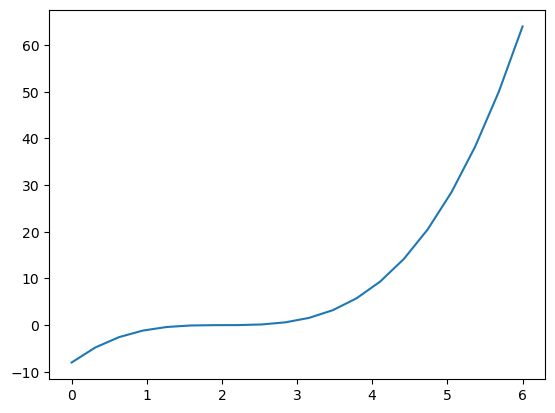

In [126]:
import matplotlib.pyplot as plt

plt.plot(csv_data[:,0], csv_data[:,1])
plt.show()

Let's take the cubic root of the second column with ```np.cbrt```
and multiply the result with ```-10```.

In [127]:
new_column = np.cbrt(csv_data[:,1]) * -10

print("new_column:\n", new_column)
print("shape:", new_column.shape)

new_column:
 [ 20.          16.84166717  13.6833691   10.52526042   7.368063
   4.21716333   1.          -2.08008382  -5.26563743  -8.42024595
 -11.57792074 -14.73612599 -17.89444393 -21.0527773  -24.21053204
 -27.36851837 -30.52626958 -33.68421571 -36.84203412 -40.        ]
shape: (20,)


We would like to append ```new_column``` to our data matrix. For this
to work we need to reshape our vector of length 20 to a matrix of shape
20 x 1. We can use ```np.newaxis``` for this.

In [128]:
new_column = new_column[:, np.newaxis] 
# or 
new_column = new_column.reshape(20,1)

print("new_column:\n", new_column)
print("shape:", new_column.shape)

new_column:
 [[ 20.        ]
 [ 16.84166717]
 [ 13.6833691 ]
 [ 10.52526042]
 [  7.368063  ]
 [  4.21716333]
 [  1.        ]
 [ -2.08008382]
 [ -5.26563743]
 [ -8.42024595]
 [-11.57792074]
 [-14.73612599]
 [-17.89444393]
 [-21.0527773 ]
 [-24.21053204]
 [-27.36851837]
 [-30.52626958]
 [-33.68421571]
 [-36.84203412]
 [-40.        ]]
shape: (20, 1)


In [129]:
new_csv_data = np.append(csv_data, new_column, axis = 1)
new_csv_data

array([[ 0.00000000e+00, -8.00000000e+00,  2.00000000e+01],
       [ 3.16000000e-01, -4.77700000e+00,  1.68416672e+01],
       [ 6.32000000e-01, -2.56200000e+00,  1.36833691e+01],
       [ 9.47000000e-01, -1.16600000e+00,  1.05252604e+01],
       [ 1.26300000e+00, -4.00000000e-01,  7.36806300e+00],
       [ 1.57900000e+00, -7.50000000e-02,  4.21716333e+00],
       [ 1.89500000e+00, -1.00000000e-03,  1.00000000e+00],
       [ 2.21100000e+00,  9.00000000e-03, -2.08008382e+00],
       [ 2.52600000e+00,  1.46000000e-01, -5.26563743e+00],
       [ 2.84200000e+00,  5.97000000e-01, -8.42024595e+00],
       [ 3.15800000e+00,  1.55200000e+00, -1.15779207e+01],
       [ 3.47400000e+00,  3.20000000e+00, -1.47361260e+01],
       [ 3.78900000e+00,  5.73000000e+00, -1.78944439e+01],
       [ 4.10500000e+00,  9.33100000e+00, -2.10527773e+01],
       [ 4.42100000e+00,  1.41910000e+01, -2.42105320e+01],
       [ 4.73700000e+00,  2.05000000e+01, -2.73685184e+01],
       [ 5.05300000e+00,  2.84460000e+01

Let's visualise the result.

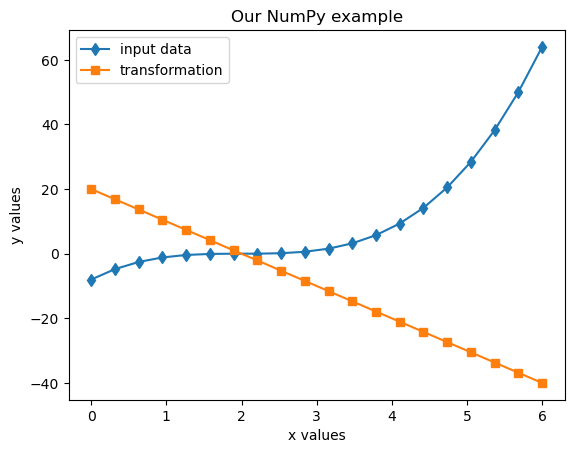

In [130]:
plt.plot(new_csv_data[:,0], new_csv_data[:,1], label = 'input data', marker = 'd')
plt.plot(new_csv_data[:,0], new_csv_data[:,2], label = 'transformation', marker = 's')

plt.xlabel('x values')
plt.ylabel('y values')

plt.title('Our NumPy example')

plt.legend()

plt.show()

Finally, we store the results in a new .csv file with ```np.savetxt```.

In [131]:
np.savetxt('data/saved_numpy_example.csv', new_csv_data, delimiter=',', 
           fmt='%1.3f', header='x,y,z')

#### Note 
that ```delimiter``` sets the character with which the numbers in 
the resulting output file shall be separated with. Further, 
```fmt='%1.3f'```  specifies that you want your entries to
be stored as floats with 3 decimals. Another example would be
```fmt = '%d'``` which would indicate that the entries shall be 
saved as integers.
***
## Pandas

Pandas is another Python library which offers a powerful way
to work with more efficient data structures and allows for
advanced data manipulation and analysis. If you have some 
experience with R, the way to work with Pandas will look 
very familiar to you.

The common abbrevation for Pandas is ```pd```.

In [132]:
import pandas as pd

In [133]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [134]:
matrix_df = pd.DataFrame(matrix, columns = ['col1','col2','col3'], 
                         index = ['row1','row2','row3'])

matrix_df

,col1,col2,col3
row1,1,2,3
row2,4,5,6
row3,7,8,9


In [135]:
matrix_df['col1']

row1    1
row2    4
row3    7
Name: col1, dtype: int64

In [136]:
matrix_df.loc['row1']

col1    1
col2    2
col3    3
Name: row1, dtype: int64

#### Note 
that for the rows you need to use ```.loc[...]```.

In [137]:
matrix_df.index

Index(['row1', 'row2', 'row3'], dtype='object')

In [138]:
matrix_df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [139]:
col_df = pd.DataFrame([10,11,12], columns = ['col4'], 
                      index = ['row1','row2','row3']) 
col_df

,col4
row1,10
row2,11
row3,12


In [140]:
row_df = col_df.T
row_df

,row1,row2,row3
col4,10,11,12


#### Note 
that ```.T``` is the tranpose operation.

In [141]:
row_df.index = ['row4']
row_df.columns = ['col1','col2','col3']
row_df

,col1,col2,col3
row4,10,11,12


In [142]:
matrix_df = pd.concat( [matrix_df, row_df] )

In [143]:
matrix_df

,col1,col2,col3
row1,1,2,3
row2,4,5,6
row3,7,8,9
row4,10,11,12


For a slightly more interesting example, we revist our country codes.

In [144]:
country_codes = {'country': ['Switzerland', 'France', 'Italy', 'UK', 'Germany'],
                 'code':[41, 33, 39, 44, 49]}

codes_df = pd.DataFrame(country_codes)
codes_df

,country,code
0,Switzerland,41
1,France,33
2,Italy,39
3,UK,44
4,Germany,49


In [145]:
codes_df['country'] == 'UK'

0    False
1    False
2    False
3     True
4    False
Name: country, dtype: bool

In [146]:
codes_df[ codes_df['country'] == 'UK' ]

,country,code
3,UK,44


In [147]:
codes_df.loc[3]

country    UK
code       44
Name: 3, dtype: object

***
### Analyse input data and write out a result file

In the following, we read in a table which specifies for different red
wines a selection of their respective properties. Each row in the table 
corresponds to a different wine. We study the data set a little bit. Pandas 
is well-suited to do data exploration with methods like
```groupby``` and ```describe```.

In [148]:
import pandas as pd

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [149]:
wine_data.shape

(1599, 12)

In [150]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [151]:
wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Count the number of red wines with a particular quality with ```value_counts```.

In [152]:
quality_counts = wine_data['quality'].value_counts()
print(quality_counts)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


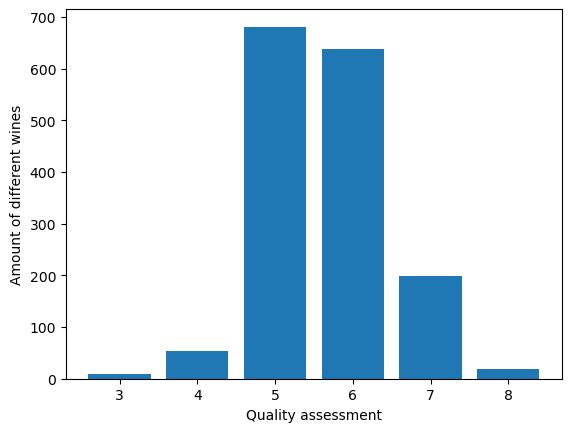

In [153]:
import matplotlib.pyplot as plt

plt.bar(quality_counts.index, quality_counts)
plt.xlabel('Quality assessment')
plt.ylabel('Amount of different wines')
plt.show()

Let us add a new column which classifies whether a red wine is a 
__premium__ wine with a rating larger than 5.

In [154]:
wine_data['premium'] = wine_data['quality'] > 5

wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


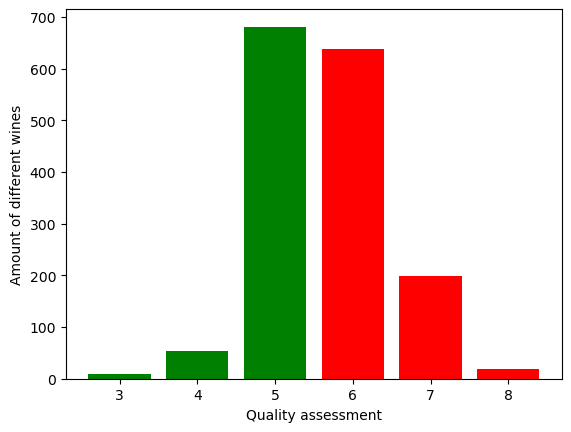

In [155]:
colours = ['green','red','red','green','red','green']

plt.bar(quality_counts.index, quality_counts, color=colours)
plt.xlabel('Quality assessment')
plt.ylabel('Amount of different wines')
plt.show()

#### Note 
that in this example the colours where abbreviated. I.e. instead of 
```color=['green','red','red','green','red','green']``` you can use just
the initial letter in one string, i.e. ```color='grrgrg'```. Also note that
the colouring is order by the heights of the bars.

In [156]:
quality_grouped = wine_data.groupby('quality')
quality_grouped

#### Note 
that ```groupby('quality')``` groups all rows with the same quality
together. However, after _collecting_ the groups it is a prior not clear
how the different rows (with the same quality) are supposed to be 
combined. Pandas now allows you to choose what operation you would like to 
perform on the grouped rows. In the following, we see some examples.

For instance, we can start with the actual groups which were identified. 
A bit similar to dictionaries, the group names are accessed by ```.keys()```.

In [157]:
quality_grouped.groups.keys()

dict_keys([3, 4, 5, 6, 7, 8])

Or we can just provide the first row in the respective group with ```.first()```.

In [158]:
quality_grouped.first()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,premium
quality,,,,,,,,,,,,
3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,False
4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,False
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,True
8,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,True


Let's display all rows in group 3 with ```.get_group(3)```.

In [159]:
quality_grouped.get_group(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premium
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,False
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,False
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,False
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,False
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,False
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,False
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,False
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,False
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,False
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,False


In [160]:
quality_grouped.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,premium
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,0.0
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,0.0
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,0.0
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,1.0
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,1.0
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,1.0


There many more methods you can apply to a ```groupby``` object.
A particularly useful one is describe which provides you with some 
statistics.

In [163]:
stats = quality_grouped.describe()
stats['alcohol']

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [164]:
stats['sulphates']

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [165]:
stats['alcohol'].to_csv("data/saved_pandas_example.csv",
                        float_format='%.3f', sep = ',', header = True, index = False)

#### Note 
that similar to ```fmt='%1.3f'``` for NumPy, ```float_format='%.3f'``` specifies
that the floats shall only have 3 decimals when writte to the .csv file.

### Efficient data format for DataFrames with *.feather files:

The ```*.feather``` file format allows you to store Pandas DataFrames in an efficient
data format with which you can load your DataFrames in R, too! Check out [this blog post](https://blog.finxter.com/pandas-dataframe-to_feather-method/). This is how it might look like in __Python__

```Python
import pandas as pd

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

# Do some computation in Python ...

wine_data.to_feather('data/winequality-red.feather')

wine_data_feather = pd.read_feather('data/winequality-red.feather')
```

and in __R__

```R
library(arrow)

wine_data_feather <- read_feather('data/winequality-red.feather')

# ... and continue in R!
```

***
## Seaborn with Pandas

Seaborn is a statistical data visualisation library which builds upon matplotlib and 
uses Pandas data structures. It makes plotting of attractive figures really easy, in 
particular in combination with Pandas objects.

The common abbrevation for seaborn is ```sns```.

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

For ggplot stlye plots use:

In [167]:
sns.set()

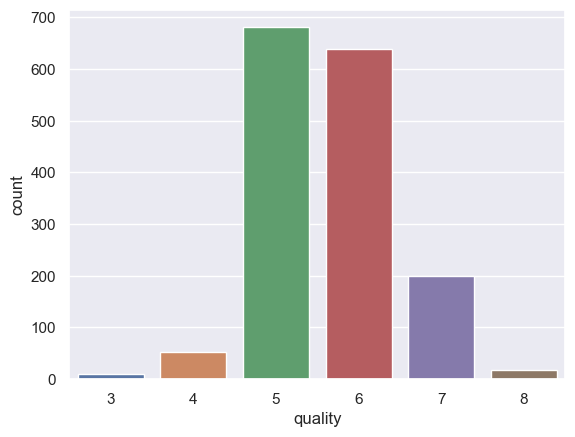

In [168]:
sns.countplot(x='quality', data=wine_data)
plt.show()

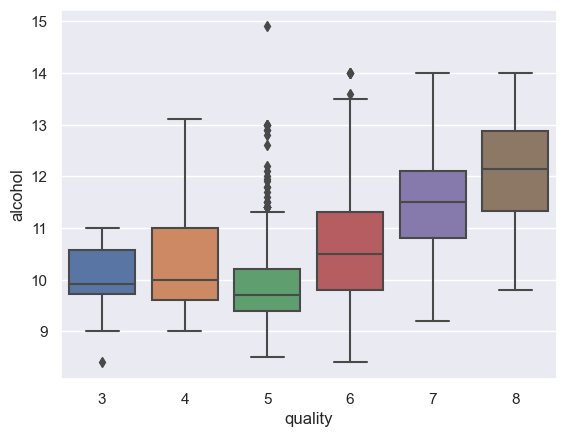

In [169]:
sns.boxplot(x='quality', y='alcohol', data=wine_data)
plt.show()

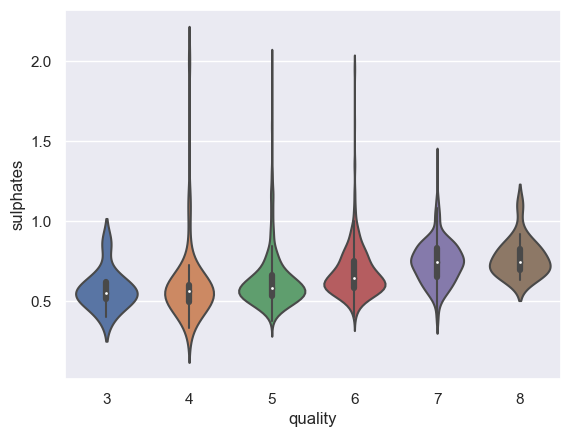

In [170]:
sns.violinplot(x='quality', y='sulphates', data=wine_data)
plt.show()

Let's consider one of the standard examples of seaborn,
the __tips__ data set.

In [171]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


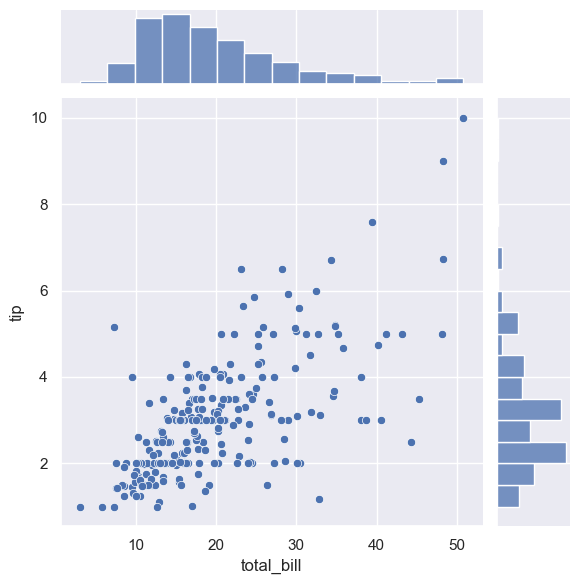

In [172]:
sns.jointplot(x="total_bill", y="tip", data=tips)
plt.show()

***
## Exercise section

(1.) Create a NumPy array with entries from 4 to 9 and reshape the array to have 
shape (3,2). Make us of ```np.arange``` and ```reshape```. Let's call this matrix
```ex1```. Put your solution here:

Check your result by executing:

In [ ]:
print(ex1)

(2.) Create an array with three random integers between 0 and 20. 
Make use of ```np.random.randint```. Let's call this matrix ```rand_ints```.
Put your solution here:

Check your result by executing:

In [ ]:
print(rand_ints)

(3.) Multiply (element-wise) the last column of ```ex1``` with ```rand_ints``` 
and assign the result to the the last column of ```ex1```. Put your solution here:

Check your result by executing:

In [ ]:
print(ex1)

(4.) Append ```rand_ints``` as a column to matrix ```ex1```. Put your solution here:

Check your result by executing:

In [ ]:
print(ex1)

(5.) Convert NumPy matrix ```ex1``` into a Pandas dataframe ```ex5``` and name the columns
of ```A```, ```B``` and ```C```. Put your solution here:

Check your result by executing:

In [ ]:
ex5

***
## Proposed Solutions


(1.) Create a NumPy array with entries from 4 to 9 and reshape the array to have 
shape (3,2). Make us of ```np.arange``` and ```reshape```. Let's call this matrix
```ex1```. Put your solution here:

In [23]:
import numpy as np
ex1 = np.arange(4,10).reshape(3,2)

Check your result by executing:

In [24]:
print(ex1)

[[4 5]
 [6 7]
 [8 9]]


(2.) Create an array with three random integers between 0 and 20. 
Make use of ```np.random.randint```. Let's call this matrix ```rand_ints```.
Put your solution here:

In [25]:
rand_ints = np.random.randint(0, 20, size=3)

Check your result by executing:

In [26]:
print(rand_ints)

[10 18 15]


(3.) Multiply (element-wise) the last column of ```ex1``` with ```rand_ints``` 
and assign the result to the the last column of ```ex1```. Put your solution here:

In [27]:
ex1[:,1] = ex1[:,1]*rand_ints

Check your result by executing:

In [28]:
print(ex1)

[[  4  50]
 [  6 126]
 [  8 135]]


(4.) Append ```rand_ints``` as a column to matrix ```ex1```. Put your solution here:

In [30]:
print(ex1.shape)
print(rand_ints.shape)

ex1 = np.append(ex1, rand_ints.reshape(3,1), axis=1)
# or alternatively (same thing):
# ex1 = np.append(ex1, rand_ints[:, np.newaxis], axis=1)

Check your result by executing:

In [31]:
print(ex1)

[[  4  50  10]
 [  6 126  18]
 [  8 135  15]]


(5.) Convert NumPy matrix ```ex1``` into a Pandas dataframe ```ex5``` and name the columns
of ```A```, ```B``` and ```C```. Put your solution here:

In [32]:
import pandas as pd
ex5 = pd.DataFrame(ex1, columns=['A','B','C'])

Check your result by executing:

In [33]:
ex5

,A,B,C
0,4,50,10
1,6,126,18
2,8,135,15
